In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; seaborn.set(style='ticks', context='talk')
%matplotlib inline

In [5]:
import sys
print sys.version

2.7.12 |Anaconda 4.2.0 (64-bit)| (default, Jun 29 2016, 11:07:13) [MSC v.1500 64 bit (AMD64)]


In [6]:
data=pd.read_csv("C:\\Users\\jpisel\\Downloads\\pickups\\june 2016.csv", index_col=[0], parse_dates=[0], header=None)

In [7]:
data.columns=['company']
data['counts']=1

In [21]:
new=data.resample('d').sum()
new.head()

,counts
0,
2016-06-13,101
2016-06-14,134
2016-06-15,133
2016-06-16,140
2016-06-17,177


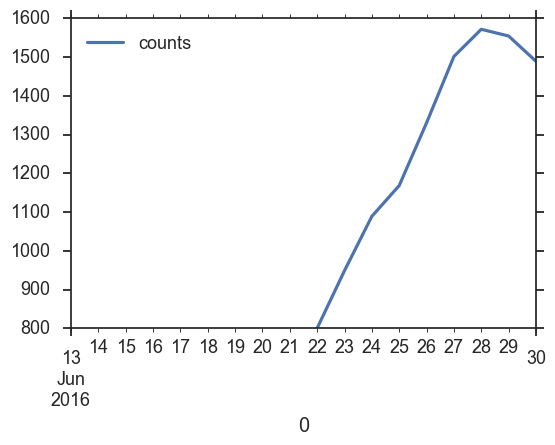

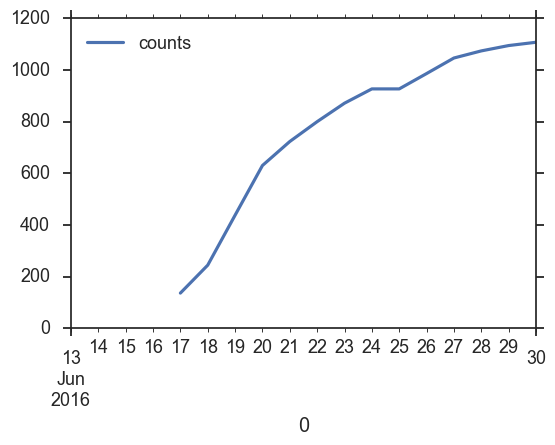

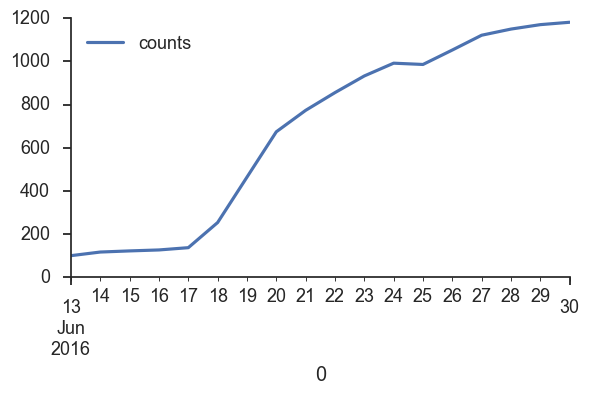

In [22]:
new.rolling(10).mean().plot(label='rolling')
new.expanding(5).mean().plot(label='expanding')
new.ewm(alpha=0.03).mean().plot(label='emwa')

plt.tight_layout()
seaborn.despine()


In [13]:
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [24]:
mod = sm.tsa.statespace.SARIMAX(new, trend='c', order=(1,1,1))

(<matplotlib.axes._subplots.AxesSubplot at 0x10df2a20>,
 <matplotlib.axes._subplots.AxesSubplot at 0x116e0438>)

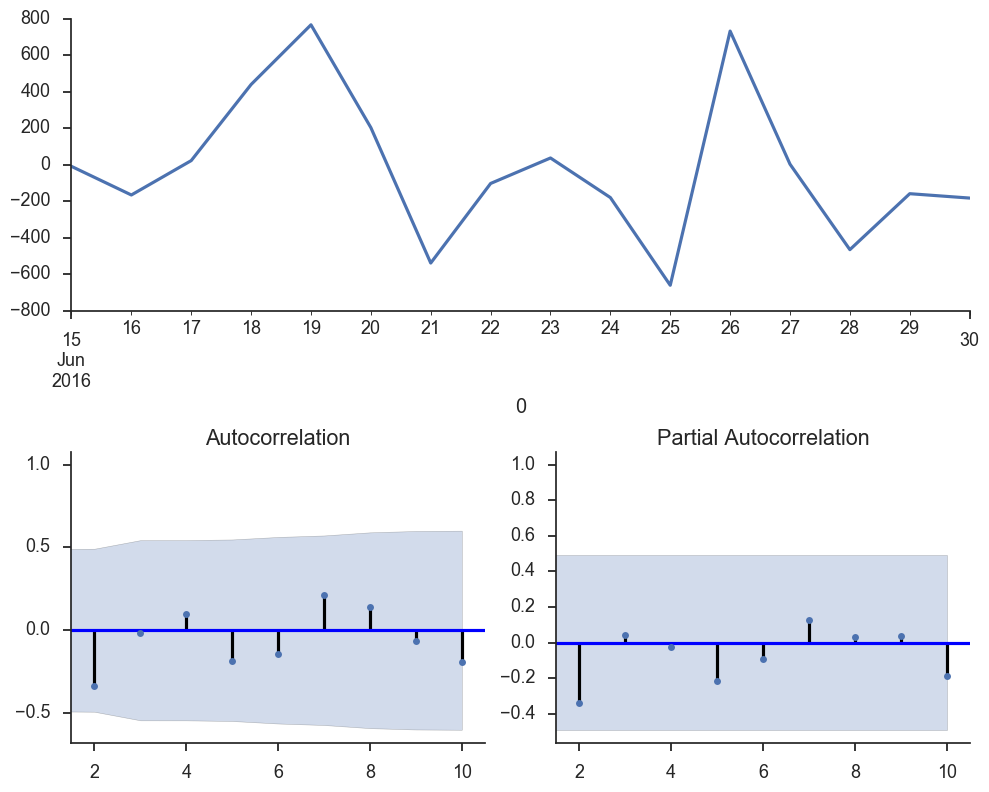

In [26]:
res = mod.fit()
tsplot(res.resid[2:], lags=10)

In [11]:
def tsplot(y, lags=None, figsize=(10, 8)):
    fig = plt.figure(figsize=figsize)
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))

    y.plot(ax=ts_ax)
    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    [ax.set_xlim(1.5) for ax in [acf_ax, pacf_ax]]
    sns.despine()
    plt.tight_layout()
    return ts_ax, acf_ax, pacf_ax

In [29]:
mod_seasonal = sm.tsa.statespace.SARIMAX(new, trend='c',
                           order=(1, 1, 2), seasonal_order=(0, 1, 2, 3))
res_seasonal = mod_seasonal.fit()

ValueError: maxlag should be < nobs